# Sentiment Analysis of Tweets: Impossible Burger

## Goals:
## Part I: Visualize positive and negative tweets in word clouds
## Part II: Use positive and negative tweets to train logistic regression machine learning model to predict positive/negative sentiments of more tweets

### Import libraries

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Part I

### Read in training set of tweets

In [2]:
train = pd.read_csv('final_impossible_text_training_tweets.csv')

In [3]:
train

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound,sentiment_label
0,https://twitter.com/Kkh291/status/140275690219...,2021-06-09 22:38:02,@me1stVegan2nd They have 2 make a smaller vers...,1402756902191210497,0,0,0,en,0.079,0.726,0.195,0.6249,0
1,https://twitter.com/VictoriaH1962/status/14027...,2021-06-09 22:37:37,@brooklin0000 @DavidMazzieAE @catfishyak Impos...,1402756797979582465,2,0,2,en,0.000,1.000,0.000,0.0000,0
2,https://twitter.com/NliteNinc2/status/14027525...,2021-06-09 22:20:39,@aminorjourney 😬\n\nMake a fake hen out of Imp...,1402752527892766724,1,0,0,en,0.100,0.769,0.131,0.3612,0
3,https://twitter.com/SonidoMatinal/status/14027...,2021-06-09 22:19:59,"🔔 Impossible Burger, la hamburguesa sin carne ...",1402752359986499584,0,0,0,ca,0.231,0.769,0.000,-0.5574,1
4,https://twitter.com/PanXchange/status/14027504...,2021-06-09 22:12:31,"In case you missed our recent #blog post, chec...",1402750481257033731,0,1,0,en,0.099,0.901,0.000,-0.2960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,https://twitter.com/e4rthmover/status/13057646...,2020-09-15 07:05:27,Loml is officially the impossible burger https...,1305764650080968704,0,0,0,en,0.000,1.000,0.000,0.0000,0
29996,https://twitter.com/edgesportnfit/status/13057...,2020-09-15 06:36:45,@michaelharriot Biggie Smalls doing remix vers...,1305757428101730304,0,0,0,en,0.000,1.000,0.000,0.0000,0
29997,https://twitter.com/cennsith/status/1305736363...,2020-09-15 05:13:03,"@t_white_no12 You’re a good dude tom, I promis...",1305736363388604417,1,0,0,en,0.000,0.794,0.206,0.8100,0
29998,https://twitter.com/fathueyfreeman/status/1305...,2020-09-15 05:12:02,i can get a impossible/turkey/chicken burger a...,1305736107347378176,0,0,0,en,0.000,0.841,0.159,0.2235,0


In [4]:
train_original=train.copy()

### Read in tweets for test set

In [5]:
test = pd.read_csv('impossible_text_training_tweets.csv', skiprows=range(1, 30001))

In [6]:
test.head()

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang
0,https://twitter.com/sucertamere/status/1305722...,2020-09-15 04:19:23,@Stardogkilledme Thoughts on the impossible bu...,1305722857654226945,0,0,0,en
1,https://twitter.com/chinchlady701/status/13057...,2020-09-15 03:59:43,@jasminelydia17 the thing is one place can hav...,1305717912125218816,0,0,2,en
2,https://twitter.com/coffieluvr/status/13057167...,2020-09-15 03:55:13,@syluwuv RIP WENDYS .. order an impossible bur...,1305716778207719425,0,0,0,en
3,https://twitter.com/BlobCostas/status/13057162...,2020-09-15 03:53:04,@nymillenials What the hell? I ordered an impo...,1305716237318545410,1,0,2,en
4,https://twitter.com/Kirra_Whatever_/status/130...,2020-09-15 03:35:57,the lady at burger king just asked me if i wan...,1305711929219055618,0,0,1,en


In [7]:
test_original=test.copy()

### Save test set of tweets (to be used in part II)

In [8]:
test_original.to_csv('test_tweets.csv', index=False)

### Combine training set and test set

In [9]:
combine = train.append(test,ignore_index=True)

In [10]:
combine

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound,sentiment_label
0,https://twitter.com/Kkh291/status/140275690219...,2021-06-09 22:38:02,@me1stVegan2nd They have 2 make a smaller vers...,1402756902191210497,0,0,0,en,0.079,0.726,0.195,0.6249,0.0
1,https://twitter.com/VictoriaH1962/status/14027...,2021-06-09 22:37:37,@brooklin0000 @DavidMazzieAE @catfishyak Impos...,1402756797979582465,2,0,2,en,0.000,1.000,0.000,0.0000,0.0
2,https://twitter.com/NliteNinc2/status/14027525...,2021-06-09 22:20:39,@aminorjourney 😬\n\nMake a fake hen out of Imp...,1402752527892766724,1,0,0,en,0.100,0.769,0.131,0.3612,0.0
3,https://twitter.com/SonidoMatinal/status/14027...,2021-06-09 22:19:59,"🔔 Impossible Burger, la hamburguesa sin carne ...",1402752359986499584,0,0,0,ca,0.231,0.769,0.000,-0.5574,1.0
4,https://twitter.com/PanXchange/status/14027504...,2021-06-09 22:12:31,"In case you missed our recent #blog post, chec...",1402750481257033731,0,1,0,en,0.099,0.901,0.000,-0.2960,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,https://twitter.com/DerQuotenossi/status/14027...,2021-06-09 22:56:14,@maulendemiri ihre Impossible Burger werden au...,1402761483759624192,1,0,1,de,NaN,NaN,NaN,NaN,NaN
39995,https://twitter.com/estebanjq3/status/14027590...,2021-06-09 22:46:24,@thehauer Like an impossible burger?,1402759010479181827,1,0,1,en,NaN,NaN,NaN,NaN,NaN
39996,https://twitter.com/WilmaDickfit6/status/14027...,2021-06-09 22:45:24,@cerebralsymphoy @AnimalJustice6 @AlanAlan5240...,1402758758716092419,0,0,0,en,NaN,NaN,NaN,NaN,NaN
39997,https://twitter.com/xiancommie/status/14027585...,2021-06-09 22:44:24,"@TheAmberPicota Yeah, I was pretty impressed b...",1402758505627455488,1,0,1,en,NaN,NaN,NaN,NaN,NaN


### Remove Twitter handles

In [11]:
def remove_pattern(text,pattern):
    
    r = re.findall(pattern,text)
    
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [12]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

### Remove punctuation, numbers, special characters

In [13]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-13-cd036dace8e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


### Remove short words

In [14]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

### Tokenize tweets

In [15]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

### Stem tweets

In [16]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [17]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

### Recombine tokens

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [19]:
combine['Tidy_Tweets'] = tokenized_tweet

### Tidy Tweets

In [20]:
combine

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound,sentiment_label,Tidy_Tweets
0,https://twitter.com/Kkh291/status/140275690219...,2021-06-09 22:38:02,@me1stVegan2nd They have 2 make a smaller vers...,1402756902191210497,0,0,0,en,0.079,0.726,0.195,0.6249,0.0,they have make smaller version imposs burger s...
1,https://twitter.com/VictoriaH1962/status/14027...,2021-06-09 22:37:37,@brooklin0000 @DavidMazzieAE @catfishyak Impos...,1402756797979582465,2,0,2,en,0.000,1.000,0.000,0.0000,0.0,imposs burger
2,https://twitter.com/NliteNinc2/status/14027525...,2021-06-09 22:20:39,@aminorjourney 😬\n\nMake a fake hen out of Imp...,1402752527892766724,1,0,0,en,0.100,0.769,0.131,0.3612,0.0,make fake imposs burger meat coyot goe chicken...
3,https://twitter.com/SonidoMatinal/status/14027...,2021-06-09 22:19:59,"🔔 Impossible Burger, la hamburguesa sin carne ...",1402752359986499584,0,0,0,ca,0.231,0.769,0.000,-0.5574,1.0,imposs burger hamburguesa carn creada laborato...
4,https://twitter.com/PanXchange/status/14027504...,2021-06-09 22:12:31,"In case you missed our recent #blog post, chec...",1402750481257033731,0,1,0,en,0.099,0.901,0.000,-0.2960,1.0,case miss recent #blog post check #hemp probab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,https://twitter.com/DerQuotenossi/status/14027...,2021-06-09 22:56:14,@maulendemiri ihre Impossible Burger werden au...,1402761483759624192,1,0,1,de,NaN,NaN,NaN,NaN,NaN,ihr imposs burger werden selben grill rinderbu...
39995,https://twitter.com/estebanjq3/status/14027590...,2021-06-09 22:46:24,@thehauer Like an impossible burger?,1402759010479181827,1,0,1,en,NaN,NaN,NaN,NaN,NaN,like imposs burger
39996,https://twitter.com/WilmaDickfit6/status/14027...,2021-06-09 22:45:24,@cerebralsymphoy @AnimalJustice6 @AlanAlan5240...,1402758758716092419,0,0,0,en,NaN,NaN,NaN,NaN,NaN,should backsid honey look like imposs burger p...
39997,https://twitter.com/xiancommie/status/14027585...,2021-06-09 22:44:24,"@TheAmberPicota Yeah, I was pretty impressed b...",1402758505627455488,1,0,1,en,NaN,NaN,NaN,NaN,NaN,yeah pretti impress their imposs burger


In [21]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

In [22]:
stopwords = ['imposs burger', 'imposs', 'burger', 'beyond', 'beyond burger', 'http', 'thi', 'carn', 'that', 'hamburguesa', 'impossibleburg', 'tri', 'they']

### Create word cloud of tweets with positive compound sentiment

In [23]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']>0])

In [24]:
wc_positive = WordCloud(background_color='white', height=1500, width=4000, stopwords=stopwords).generate(all_words_positive)

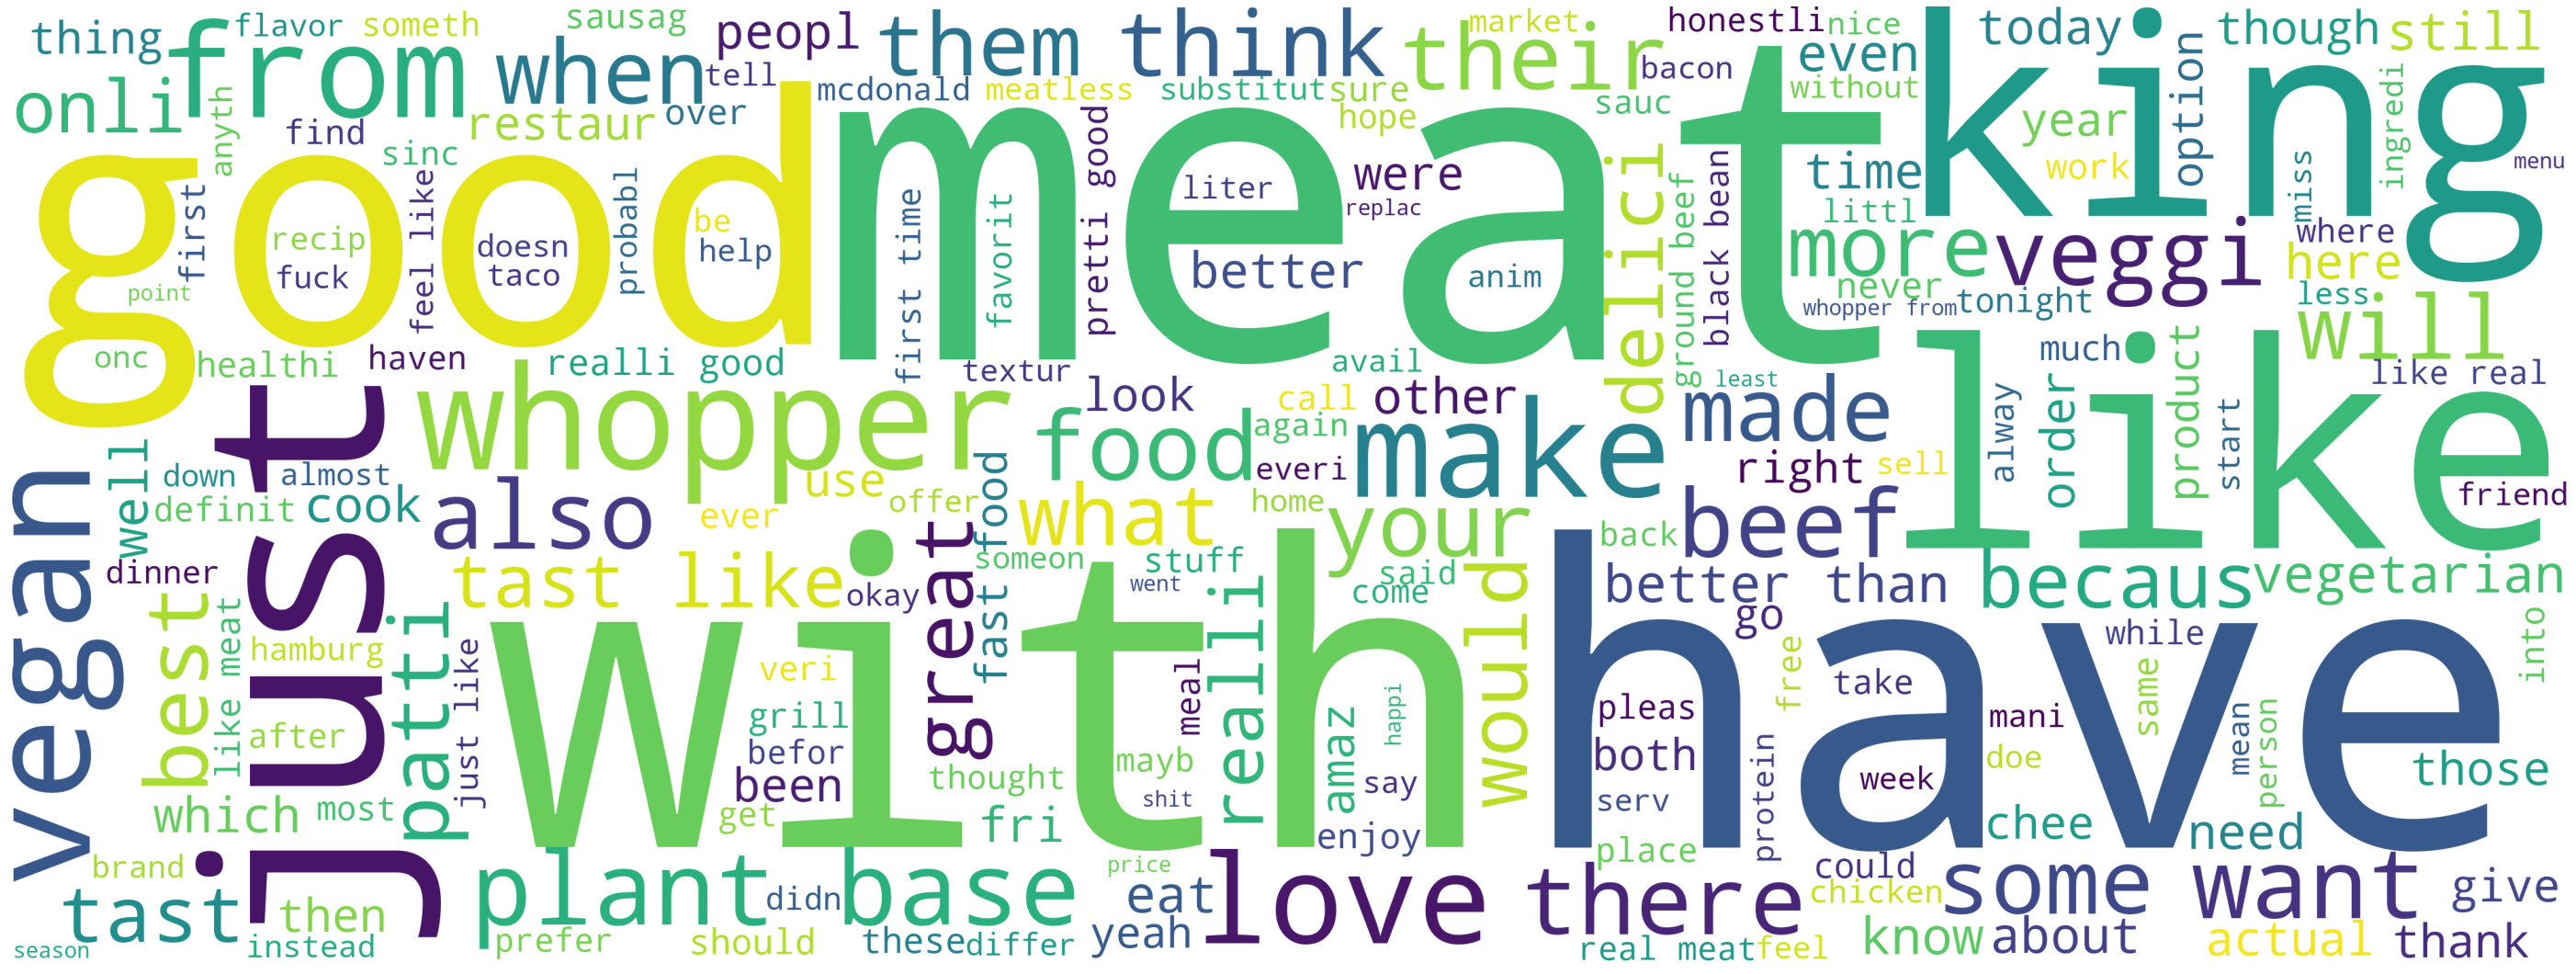

In [25]:
plt.figure(figsize=(50,50))
plt.imshow(wc_positive)
plt.axis('off')
plt.show()

In [26]:
wc_positive.to_file('impossible_wc_positive.png')

### Create word cloud of tweets with negative compound sentiment

In [27]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']<0])

In [28]:
wc_negative = WordCloud(background_color='white', height=1500, width=4000, stopwords=stopwords).generate(all_words_negative)

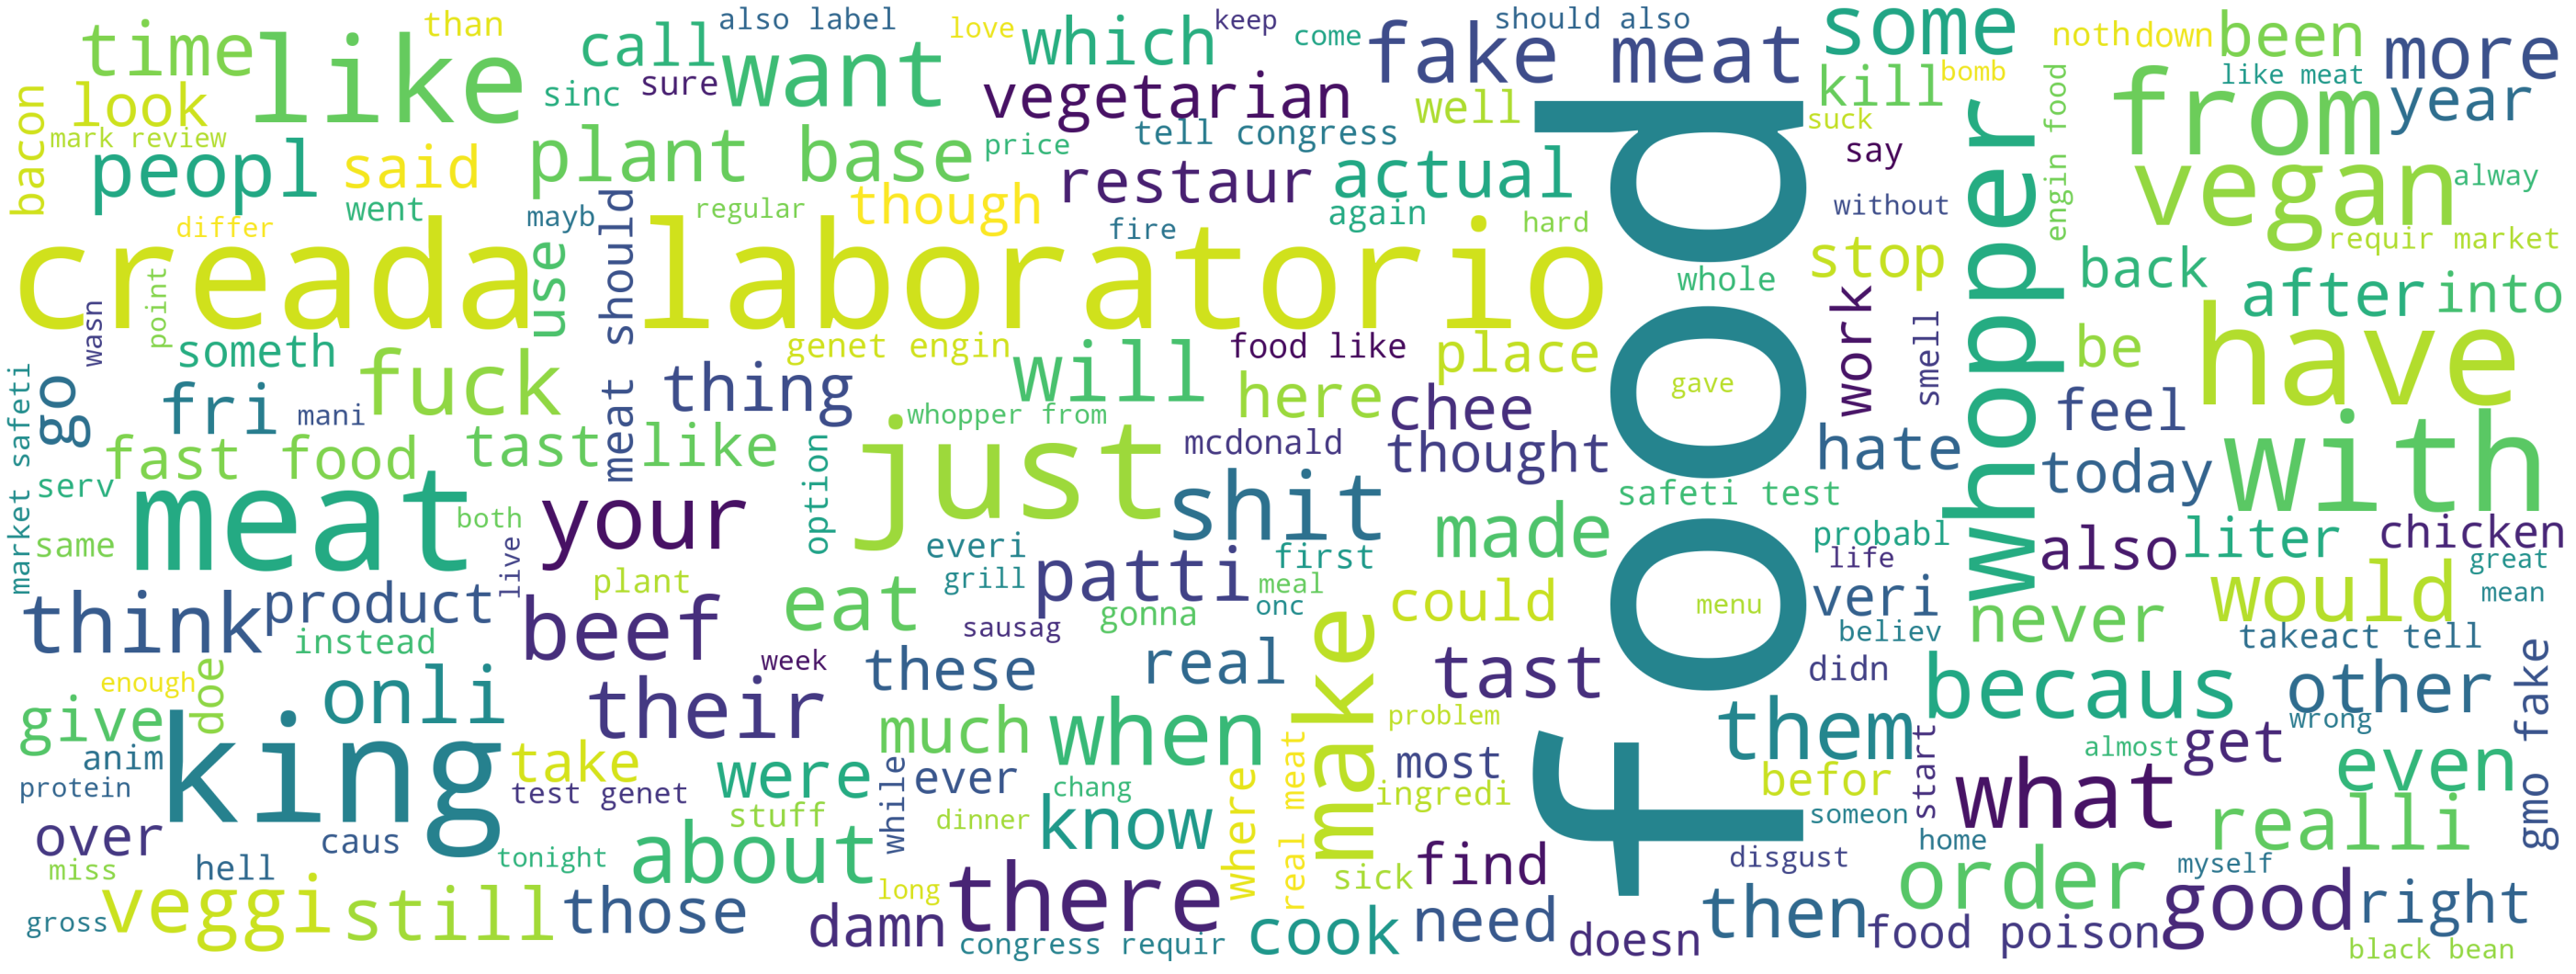

In [29]:
plt.figure(figsize=(50,50))
plt.imshow(wc_negative)
plt.axis('off')
plt.show()

In [30]:
wc_negative.to_file('impossible_wc_negative.png')

In [31]:
def Hashtags_Extract(x):
    hashtags=[]
    
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

### Extract hashtags from tweets with positive compound sentiment

In [32]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']>0])

In [33]:
ht_positive

[[],
 [],
 [],
 ['imposs', 'burger', 'myownrecip'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['shitamdavadeat'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['quantumburg', 'crueltyfre'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['helpmehelpy'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['burgerk'],
 [],
 [],
 [],
 [],
 ['impossibleburg',
  'eatdantanna',
  'burger',
  'veganburg',
  'atlvegan',
  'atlantavegan',
  'atlvegan',
  'impossiblefood'],
 [],
 ['plantbas', 'vegan'],
 [],
 [],
 ['whopper'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [34]:
ht_positive_unnest = sum(ht_positive,[])

In [35]:
ht_positive_unnest

['imposs',
 'burger',
 'myownrecip',
 'shitamdavadeat',
 'quantumburg',
 'crueltyfre',
 'helpmehelpy',
 'burgerk',
 'impossibleburg',
 'eatdantanna',
 'burger',
 'veganburg',
 'atlvegan',
 'atlantavegan',
 'atlvegan',
 'impossiblefood',
 'plantbas',
 'vegan',
 'whopper',
 'whopper',
 'fastfood',
 'vegan',
 'meatless',
 'impossibleburg',
 'pride',
 'prideal',
 'plantbas',
 'plantbasedfood',
 'sayftychat',
 'impossibleburg',
 'icecreamsandwhich',
 'melt',
 'comedi',
 'sundaysunda',
 'indoorveganbbq',
 'imposs',
 'vegan',
 'tombergin',
 'eatbeef',
 'burger',
 'vegetarian',
 'food',
 'redrobin',
 'govegan',
 'hors',
 'nationalveggieburgerday',
 'yyc',
 'nationalveggieburgerday',
 'vegetarian',
 'vegan',
 'veggieburg',
 'veganburg',
 'veganchees',
 'pescatarian',
 'beanburg',
 'plantbas',
 'veganfriendli',
 'veganrestaur',
 'beyond',
 'impossibleburg',
 'wahlburg',
 'pittsburgh',
 'impossibleburg',
 'nationalveggieburgerday',
 'nationalveggieburgereday',
 'veggielov',
 'nationalvrggieburger

### Extract hashtags from tweets with negative compound sentiment

In [36]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']<0])

In [37]:
ht_negative

[[],
 ['blog', 'hemp', 'impossibleburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['burgerk', 'impossibleburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['burger', 'food'],
 [],
 [],
 [],
 [],
 ['impossibleburg',
  'artoftheburg',
  'themetropolitianmuseum',
  'themetro',
  'dupontcircl',
  'willheeverreturn'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['doghau'],
 [],
 [],
 [],
 ['burgerk'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['mcdonald', 'maggi', 'noodl', 'burger'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [38]:
ht_negative_unnest = sum(ht_negative,[])

In [39]:
ht_negative_unnest

['blog',
 'hemp',
 'impossibleburg',
 'burgerk',
 'impossibleburg',
 'impossibleburg',
 'burger',
 'food',
 'impossibleburg',
 'artoftheburg',
 'themetropolitianmuseum',
 'themetro',
 'dupontcircl',
 'willheeverreturn',
 'doghau',
 'burgerk',
 'mcdonald',
 'maggi',
 'noodl',
 'burger',
 'saveprodigalson',
 'overdressedexpert',
 'impossibleburg',
 'grill',
 'fakenew',
 'summertim',
 'newfestprid',
 'notalonetalk',
 'foodielif',
 'miamirestaur',
 'healthyfoodmotiv',
 'healthylif',
 'meetpeopleinmiami',
 'aromasmiami',
 'aromamia',
 'beyondmeat',
 'impossibleburg',
 'billgat',
 'eatbeef',
 'demandusabeef',
 'memorialday',
 'veganfilmclub',
 'nationalburgerday',
 'involuntarilyvegan',
 'impossibleburg',
 'food',
 'diet',
 'letsgeteth',
 'impossibleburg',
 'eatplantbasedfood',
 'plantbas',
 'washu',
 'imposs',
 'live',
 'memorialday',
 'free',
 'live',
 'memorialday',
 'free',
 'live',
 'memorialday',
 'free',
 'frankenfood',
 'saynotogmo',
 'burgerk',
 'mcdonald',
 'lunaci',
 'bullshit',
 

### Frequency of hashtags from tweets with positive compound sentiment

In [40]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

In [41]:
word_freq_positive

FreqDist({'impossibleburg': 469, 'vegan': 138, 'plantbas': 93, 'burger': 73, 'imposs': 52, 'vegetarian': 50, 'podcast': 48, 'marri': 48, 'chat': 48, 'life': 48, ...})

In [42]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [43]:
sorted_df_positive = df_positive.sort_values(by='Count', ascending=False)

In [44]:
sorted_df_positive

,Hashtags,Count
8,impossibleburg,469
15,vegan,138
14,plantbas,93
1,burger,73
0,imposs,52
...,...,...
583,makingmemori,1
582,bt,1
581,mothersday,1
580,veganfoodi,1


### Frequency of hashtags from tweets with negative compound sentiment

In [45]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [46]:
word_freq_negative

FreqDist({'gmo': 108, 'impossibleburg': 93, 'vegan': 40, 'plantbas': 23, 'wewereher': 19, 'takeact': 17, 'burger': 14, 'vegetarian': 14, 'burgerk': 11, 'imposs': 10, ...})

In [47]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [48]:
sorted_df_negative = df_negative.sort_values(by='Count', ascending=False)

In [49]:
sorted_df_negative

,Hashtags,Count
84,gmo,108
2,impossibleburg,93
49,vegan,40
40,plantbas,23
399,wewereher,19
...,...,...
181,radio,1
180,dotheimpossibledav,1
179,burnvegan,1
178,supercarnivor,1


In [50]:
import dataframe_image as dfi

In [51]:
dfi.export(sorted_df_positive, 'impossible_df_positive.png', max_rows=30)

In [52]:
dfi.export(sorted_df_negative, 'impossible_df_negative.png', max_rows=30)

## Part II

### Create bag-of-words feature matrix

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [55]:
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

In [56]:
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Create TF-IDF feature matrix

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

In [59]:
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

In [60]:
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
39995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
39996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.559408,0.0,0.0,0.0,0.0,0.0,0.0


### Split into training set and validation set

In [61]:
train_bow = bow[:30000]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [62]:
train_tfidf_matrix = tfidf_matrix[:30000]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['sentiment_label'],test_size=0.3,random_state=2)

In [65]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['sentiment_label'],test_size=0.3,random_state=17)

### Import F1 score to assess performance of machine learning models

In [66]:
from sklearn.metrics import f1_score

## Part II: Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

### Fit model with bag-of-words features

In [69]:
Log_Reg.fit(x_train_bow, y_train_bow)

/opt/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### Predict probabilities of tweets having positive or negative classification for bag-of-words features

In [70]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[0.9863071 , 0.0136929 ],
       [0.90353362, 0.09646638],
       [0.8484917 , 0.1515083 ],
       ...,
       [0.96049171, 0.03950829],
       [0.56915717, 0.43084283],
       [0.94526566, 0.05473434]])

In [71]:
prediction_int = prediction_bow[:,1]>=0.3

In [72]:
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 1, 0])

### F1 score for bag-of-words features

In [73]:
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.6493894841764266

### Fit model with TF-IDF features

In [74]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [75]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.71125541, 0.28874459],
       [0.84980344, 0.15019656],
       [0.86254584, 0.13745416],
       ...,
       [0.96874022, 0.03125978],
       [0.442632  , 0.557368  ],
       [0.45972733, 0.54027267]])

In [76]:
prediction_int = prediction_tfidf[:,1]>=0.3

In [77]:
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 1, 1])

### F1 score for TF-IDF features

In [78]:
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.6655129789864029

## Part II: XGBoost

In [84]:
from xgboost import XGBClassifier

### Fit model with bag-of-words features

In [85]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [86]:
model_bow.fit(x_train_bow, y_train_bow)

/opt/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Predict probabilities of tweets having positive or negative classification for bag-of-words features

In [87]:
xgb = model_bow.predict_proba(x_valid_bow)
xgb

array([[0.9906486 , 0.00935134],
       [0.98487866, 0.01512134],
       [0.9166703 , 0.08332965],
       ...,
       [0.971484  , 0.02851602],
       [0.44976425, 0.55023575],
       [0.9542348 , 0.04576521]], dtype=float32)

In [88]:
xgb=xgb[:,1]>=0.3

In [89]:
xgb_int=xgb.astype(np.int)

### F1 score for bag-of-words features

In [90]:
xgb_bow=f1_score(y_valid_bow,xgb_int)
xgb_bow

0.63905325443787

### Fit model with TF-IDF features

In [91]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

In [92]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

/opt/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:14:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=29,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [93]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)
xgb_tfidf

array([[0.81401116, 0.18598883],
       [0.8624071 , 0.13759291],
       [0.8798419 , 0.1201581 ],
       ...,
       [0.9726147 , 0.02738531],
       [0.10355604, 0.89644396],
       [0.54655373, 0.4534463 ]], dtype=float32)

In [94]:
xgb_tfidf=xgb_tfidf[:,1]>=0.3

In [95]:
xgb_int_tfidf=xgb_tfidf.astype(np.int)

### F1 score for TF-IDF features

In [96]:
score=f1_score(y_valid_tfidf,xgb_int_tfidf)
score

0.6396682117589656

## Part II: Decision Trees

In [97]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Fit model with bag-of-words features

In [98]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

### Predict probabilities of tweets having positive or negative classification for bag-of-words features

In [99]:
dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [100]:
dct_bow=dct_bow[:,1]>=0.3

In [101]:
dct_int_bow=dct_bow.astype(np.int)

### F1 score for bag-of-words features

In [102]:
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)
dct_score_bow

0.5555813413785101

### Fit model with TF-IDF

In [103]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [104]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.92893924, 0.07106076],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [105]:
dct_tfidf=dct_tfidf[:,1]>=0.3

In [106]:
dct_int_tfidf=dct_tfidf.astype(np.int)

### F1 score for TF-IDF features

In [107]:
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)
dct_score_tfidf

0.573525813555175

## Part II: Model Comparison

In [108]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

In [109]:
score_1 = [log_bow,xgb_bow,dct_score_bow]

In [110]:
compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

### F1 score of different models using bag-of-words features

In [111]:
compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.649389,0.639053,0.555581


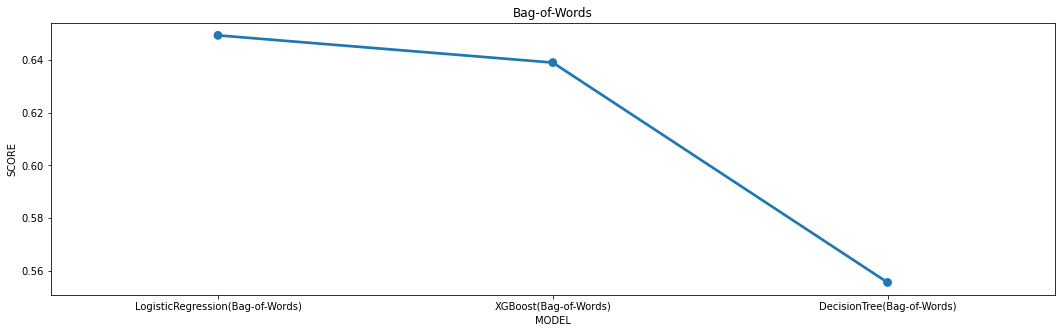

In [112]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [113]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [114]:
score_2 = [log_tfidf,score,dct_score_tfidf]

In [115]:
compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

### F1 score of different models using TF-IDF features

In [116]:
compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.665513,0.639668,0.573526


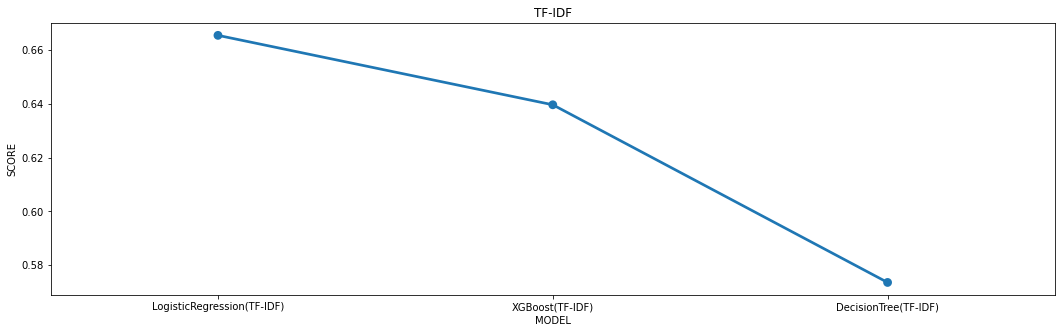

In [117]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [118]:
Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

In [119]:
score_best = [log_bow,log_tfidf]

In [120]:
compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

### Compare logistic regression F1 scores for bag-of-words and TF-IDF features

In [121]:
compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.649389,0.665513


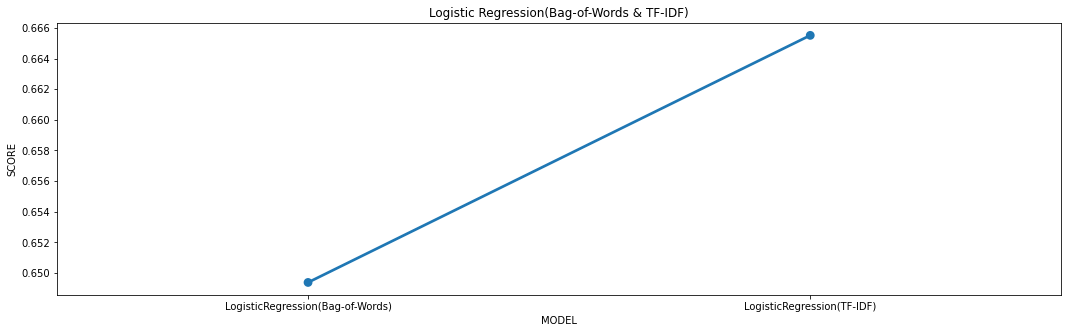

In [122]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

## Part II: Predict results of test data via logisitic regression model using TF-IDF features

In [123]:
test_tfidf = tfidf_matrix[30000:]

In [124]:
test_pred = Log_Reg.predict_proba(test_tfidf)

In [125]:
test_pred_int = test_pred[:,1] >= 0.3

In [126]:
test_pred_int = test_pred_int.astype(np.int)

In [127]:
test['label'] = test_pred_int

In [129]:
submission = test[['tweet','label']]

In [130]:
submission.to_csv('result.csv', index=False)

In [131]:
res = pd.read_csv('result.csv')
res

,tweet,label
0,@Stardogkilledme Thoughts on the impossible bu...,0
1,@jasminelydia17 the thing is one place can hav...,0
2,@syluwuv RIP WENDYS .. order an impossible bur...,0
3,@nymillenials What the hell? I ordered an impo...,1
4,the lady at burger king just asked me if i wan...,0
...,...,...
9994,@maulendemiri ihre Impossible Burger werden au...,0
9995,@thehauer Like an impossible burger?,0
9996,@cerebralsymphoy @AnimalJustice6 @AlanAlan5240...,0
9997,"@TheAmberPicota Yeah, I was pretty impressed b...",0
